# EDA on Ecommerce dataset

---

### Data Collection
Data Collection is the first step in Exploratory Data Analysis (EDA).
In this step, we load the dataset and understand its basic structure
* The dataset used in this process was obtained from Kaggle Platform
* Data Source : https://www.kaggle.com/
---

- The collected dataset contains 3500 rows and 7 coloumns
##### Coloumns details 
* <B>Order Date</B> : date when the product was ordered.(ex:2024-12-31)
* <B>Product Name</b> : which product was sold.(Printer, Mouse, Tablet)
* <b>Category</b> :shows the type of product.(Electronics → Tablet,Accessories → MouseOffice→ Printer)
* <b>Region</b> : where the product was sold.(Regions include: North, South, East, West)
* <b>Quantity</b> :how many units of the product were sold (Quantity = 4 means 4 items were sold)
* <b>Sales</b> : total sales amount (money earned)(Sales = 3640 means ₹3640 sales value)
* <b>Profit</b> : how much profit was made(348.93 means ₹348.93 profit)

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
# read the dataset
ecom_df = pd.read_csv('ecommerce_sales_data.csv')
ecom_df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [5]:
#checks dataset shape
ecom_df.shape

(3500, 7)

In [6]:
#to view the columns in the dataset
ecom_df.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Quantity', 'Sales',
       'Profit'],
      dtype='object')

In [7]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


In [8]:
ecom_df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


* describe() applies only on numerical features 
* here quality,sales,and profits are in numerical formate so there no type miss matching 

In [9]:
ecom_df.describe(include='object')

,Order Date,Product Name,Category,Region
count,3500,3500,3500,3500
unique,1051,10,3,4
top,2023-08-12,Monitor,Electronics,West
freq,11,364,1742,898


## Data Cleaning
  in this step ,we check :
- Check for missing values
- Identify duplicate records
- Verify data types
- Ensure overall data quality


In [10]:
ecom_df.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

** there is no missing values in the dataset**

In [11]:
ecom_df.duplicated().sum()

np.int64(0)

##### remove duplicates if any

In [12]:
ecom_df.drop_duplicates()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28
...,...,...,...,...,...,...,...
3495,2023-02-15,Monitor,Accessories,North,4,4064,771.16
3496,2022-09-18,Monitor,Accessories,East,1,1117,119.89
3497,2022-04-12,Laptop,Electronics,South,4,260,66.02
3498,2022-01-18,Printer,Office,South,3,222,50.28


#### Duplicates were checked but we not found any duplicates

In [13]:
ecom_df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


#### provides information about sales, profit, and quantity,such as mean, minimum, and maximum values.

In [14]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


## Data Exploration
#### it helps to understanding the data by using visualizations and statistics

#### EDA is divided into :
- Univariate Analysis
- Bivariate Analysis
    

#### Univariated Analysis
##### Univariate analysis focuses on analyzing a single variable at a time.


This graph shows that most products have low sales,
and only a few products have very high sales.

Text(0.5, 1.0, 'Distribution of Sales')

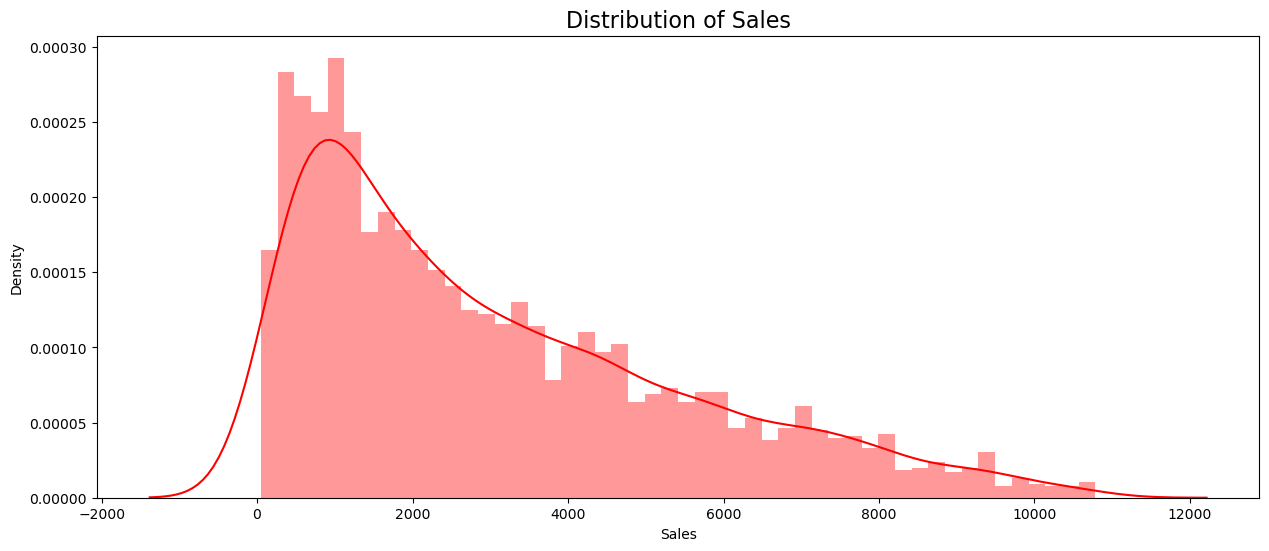

In [15]:
plt.figure(figsize=(15, 6))
plot = sns.distplot(ecom_df['Sales'], color='r', bins=50)
plt.title('Distribution of Sales', fontsize=16)


**Observation :**
This plot shows the distribution of Sales values in the dataset.
Most sales are concentrated at lower values, and as sales increase, the number of records gradually decreases.
The curve is right-skewed, which means few products have very high sales, while most products have low to moderate sales.

---

#### Bivariated Analysis 
##### 

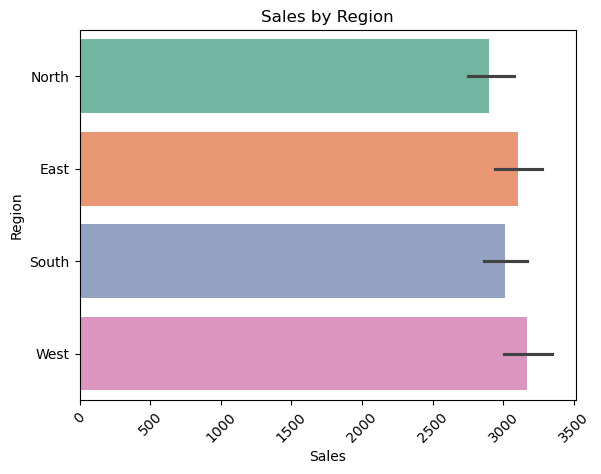

In [16]:
plt.figure()
sns.barplot(x='Sales', y='Region', data=ecom_df, palette='Set2')
plt.title("Sales by Region")
plt.xticks(rotation=45)
plt.show()


The West region has the highest sales, and the North region has the lowest sales.


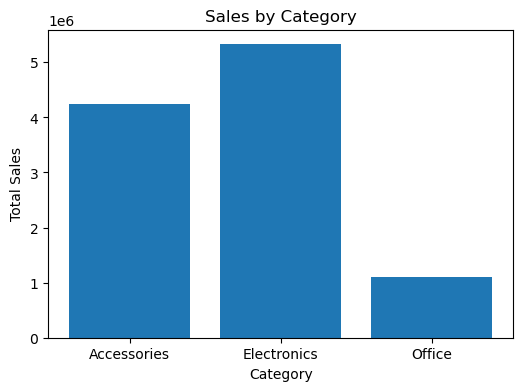

In [17]:
category_sales = ecom_df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(6, 4))
plt.bar(category_sales.index, category_sales.values)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales by Category')
plt.show()



**Observations:**
 Electronics category has the highest total sales, followed by Accessories, while Office products have the lowest sales.

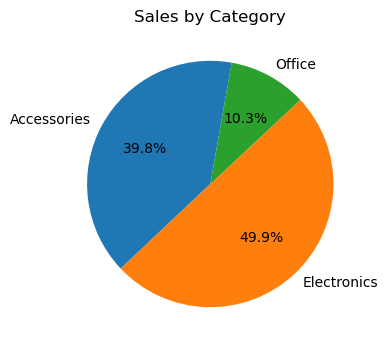

In [18]:
# Sales by category
sales_by_category = ecom_df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(5,4))
plt.pie(
    sales_by_category,
    labels=sales_by_category.index,
    autopct='%1.1f%%',
    startangle=80
)

plt.title("Sales by Category")
plt.show()


**Observation :** 
The pie chart represents the percentage contribution of total sales by category.
Electronics has the highest share of sales at 49.9%, indicating it is the top-performing category.
Accessories contributes 39.8%, showing strong sales performance.
Office has the lowest contribution at 10.3%, meaning it generates comparatively fewer sales.

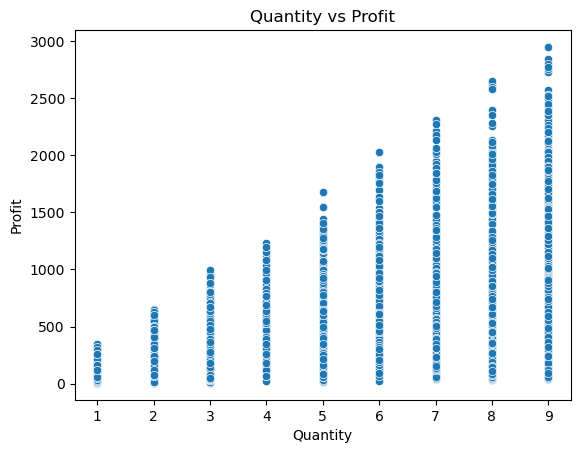

In [19]:
plt.figure()
sns.scatterplot(x='Quantity', y='Profit', data=ecom_df)
plt.title("Quantity vs Profit")
plt.show()


**Observation**
Profit generally increases as quantity increases, showing a positive relationship between quantity sold and profit.

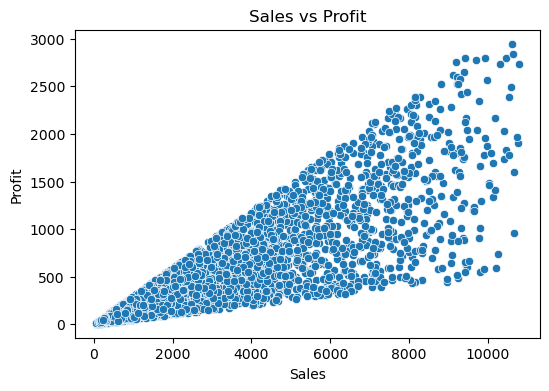

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Sales', y='Profit', data=ecom_df)
plt.title("Sales vs Profit")
plt.show()


**Observation:**  
Sales and profit move in the same direction, so when sales increase, profit also increases.
Low sales values mostly have low profit, while higher sales generally show higher profit.


---
### Correlation Analysis

Correlation analysis is used to understand the relationship
between numerical variables.

Only numeric columns are used because correlation
cannot be calculated on text data.

Hence we are using heat maps


In [21]:
corr = ecom_df[['Quantity', 'Sales', 'Profit']].corr()

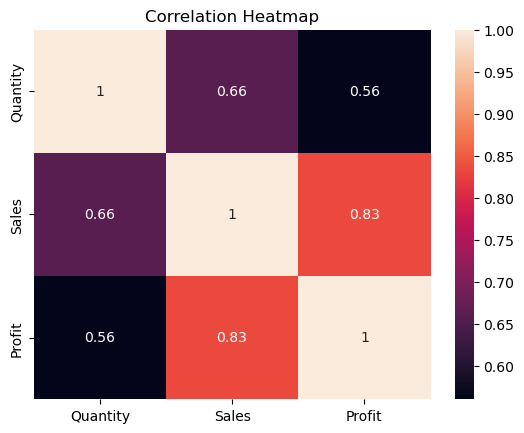

In [22]:


# select only numerical columns
corr = ecom_df[['Quantity', 'Sales', 'Profit']].corr()

# heatmap
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()


#### This heatmap shows the correlation between quantity, sales, and profit.It helps us understand how one value changes with another.Sales and profit are positively related, meaning when sales increase, profit also increases.

---

In [23]:
top_10=ecom_df.sort_values('Sales',ascending=False).head(10)

top_10

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
1127,2023-09-29,Keyboard,Accessories,South,9,10782,2730.14
32,2023-04-09,Laptop,Electronics,North,9,10773,1907.36
2573,2022-06-27,Laptop,Electronics,East,9,10728,1967.84
1489,2023-12-18,Monitor,Accessories,West,9,10665,1595.08
379,2022-05-09,Printer,Office,West,9,10656,961.30
2347,2022-11-16,Keyboard,Accessories,South,9,10629,2843.54
2392,2023-02-02,Laptop,Electronics,South,9,10620,2946.93
2144,2023-12-06,Mouse,Accessories,North,9,10593,2488.69
153,2024-08-08,Monitor,Accessories,North,9,10530,2387.63
3499,2024-11-01,Smartwatch,Electronics,East,9,10530,1777.32


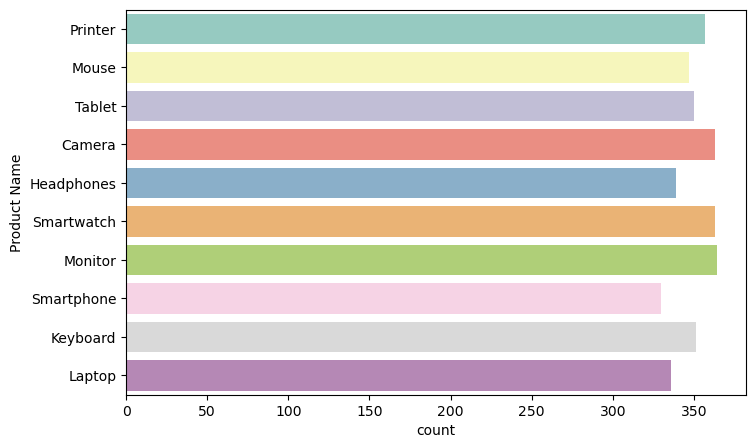

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Product Name', data=ecom_df, palette='Set3')
plt.show()

**Observation :**
bar chart shows the number of records (count) for each product in the dataset.
Products like Camera, Monitor, Smartwatch, and Printer have higher counts,
Products such as Laptop and Smartphone have slightly lower counts but are still significant.
Overall, the chart helps understand which products are more common in the dataset.

---
### Conclusion

In this project, Exploratory Data Analysis (EDA) was performed on an e-commerce sales dataset.
The data was clean with no missing values.
Sales and profit show a positive relationship, means when sales increases profit also increases.
Overall, this analysis helps in understanding business performance and supports better decision-making.
